In [10]:
#!pip install drawdata
from drawdata import draw_scatter # library to draw some random fake data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve,precision_score, plot_roc_curve
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt  
%matplotlib inline



In [11]:
draw_scatter()

In [12]:
# Now we have a random data where we can do an experiment

data=pd.read_csv('data.csv')
data


,x,y,z
0,242.745226,366.553286,a
1,284.548264,340.130610,a
2,284.214756,372.275147,a
3,210.031359,363.559344,a
4,217.955841,344.449570,a
...,...,...,...
778,416.863813,198.346559,b
779,443.455946,180.719149,b
780,419.750607,201.372412,b
781,408.263053,191.682185,b


In [13]:
data['z'].loc[data['z']=='a']=1
data['z'].loc[data['z']=='b']=0

data['z']=pd.to_numeric(data['z'])
data



C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,x,y,z
0,242.745226,366.553286,1
1,284.548264,340.130610,1
2,284.214756,372.275147,1
3,210.031359,363.559344,1
4,217.955841,344.449570,1
...,...,...,...
778,416.863813,198.346559,0
779,443.455946,180.719149,0
780,419.750607,201.372412,0
781,408.263053,191.682185,0


In [14]:
Y=data['z']
Y=pd.DataFrame(Y)

X=data.iloc[:,0:2]

print(X.shape)
print(Y.shape)


(783, 2)
(783, 1)


In [15]:
# Now we are going to use the train_test_split function to split our data into training and testing set.

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=43) # 20% test size used 



In [16]:
# training the model with logistic regression
model=LogisticRegression()
model.fit(x_train, y_train)


C:\Users\LENOVO\anaconda3\envs\MsDataScience\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [17]:
y_pred = model.predict_proba(x_test)[:,1]
y_pred

array([0.16126132, 0.72754767, 0.86710665, 0.02160761, 0.74566821,
       0.80822359, 0.79408023, 0.38017019, 0.22610869, 0.87293516,
       0.87053006, 0.73059017, 0.26849732, 0.00233288, 0.02605257,
       0.6239457 , 0.00714403, 0.95115358, 0.35977793, 0.98618782,
       0.98947613, 0.89611345, 0.8572293 , 0.05506818, 0.77230443,
       0.54025085, 0.48449402, 0.67847769, 0.01069465, 0.98849419,
       0.35031392, 0.64275089, 0.84599919, 0.50833548, 0.67410086,
       0.9566211 , 0.47704588, 0.91894158, 0.47278089, 0.37415361,
       0.0116108 , 0.55381463, 0.25654974, 0.60687458, 0.06577826,
       0.60109547, 0.98548191, 0.9741303 , 0.17123874, 0.34653003,
       0.01144451, 0.76874182, 0.00877285, 0.49335429, 0.19187667,
       0.7605902 , 0.00747127, 0.40323899, 0.03145997, 0.83663002,
       0.02990249, 0.87983121, 0.11232979, 0.73243067, 0.03095618,
       0.06564476, 0.73380218, 0.33383129, 0.73622062, 0.06787818,
       0.51364176, 0.27373034, 0.13754428, 0.86325073, 0.56497

In [18]:
thresholds = np.linspace(0,1,100) # taking 100 threshold values between 0 and 1

In [19]:
def tp_fp(y_pred, th):
    y_pred1 = pd.Series(np.where(y_pred>=th, 1, 0), 
                     dtype='category')
    #for i in range(len(y_pred)):
     #   if y_pred[i]>=th:
      #      y_pred[i]=1
       # else:
        #    y_pred[i]=0
    tn,fp,fn,tp=confusion_matrix(y_test, y_pred1).ravel()
    return tp,fp



    
    
    

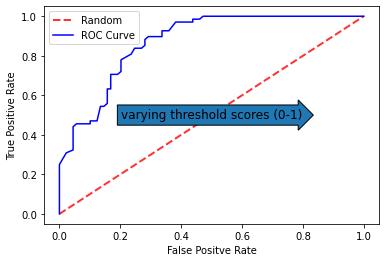

In [20]:
tpr=[]
fpr=[]

positives = np.sum(y_test==1)
negatives = np.sum(y_test==0)

for t in thresholds:
    tp, fp=tp_fp(y_pred,t)
    tpr.append(tp/positives)
    fpr.append(fp/negatives)
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=12,ha="center", va="center",bbox=dict(boxstyle="rarrow"))
plt.xlabel("False Positve Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [21]:
# Checking AUC score

auc_score = roc_auc_score(y_test, y_pred)
auc_score



0.8704560475875743

In [36]:
tpr1=np.array(tpr)
fpr1=np.array(fpr)

gmean=np.sqrt(tpr1 * (1-fpr1)) # 1-fpr will give us true negative rate (tnr) or specificity
gmean # geometric mean of true positive rate and true negative rate at every threshold

array([[0.        ],
       [0.35156152],
       [0.43704832],
       [0.49718308],
       [0.54049499],
       [0.57082633],
       [0.58058475],
       [0.6271032 ],
       [0.64477154],
       [0.68695714],
       [0.68695714],
       [0.68695714],
       [0.70312305],
       [0.71106819],
       [0.72669793],
       [0.72669793],
       [0.72896816],
       [0.73652244],
       [0.73652244],
       [0.74400001],
       [0.7384269 ],
       [0.75305064],
       [0.76025703],
       [0.76739575],
       [0.76739575],
       [0.76739575],
       [0.77446867],
       [0.77029706],
       [0.77702468],
       [0.78369454],
       [0.78369454],
       [0.78369454],
       [0.77115462],
       [0.77115462],
       [0.77766237],
       [0.7968668 ],
       [0.79655571],
       [0.78316726],
       [0.78242847],
       [0.78242847],
       [0.78842418],
       [0.78842418],
       [0.78842418],
       [0.78842418],
       [0.78842418],
       [0.78842418],
       [0.79437464],
       [0.786

In [40]:
# optimal geometric mean and its index
index=np.argmax(gmean) # optimal geometric mean would be the highest geometric mean
print('At index:',index)
print('geometric mean is: ',gmean[index])

At index: 35
geometric mean is:  [0.7968668]


In [33]:
# optimal threshold
thresholds[index] # threshold of 0.35 will give us the highest mean and best tpr to fpr ratio

0.3535353535353536

In [34]:
# calculating true positive rate and false positive rate at optimal threshold
print(tpr1[index])
print(fpr1[index]) 

[0.89705882]
[0.29213483]
